## Long Short-Term Memory 

In this assignment, we will learn about LSTM models. We will create an LSTM model for time series prediction.

In [1]:
import numpy as np
import os
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

Below is a function for loading time series data collected by sensors. There are 9 different files, We have data about body acceleration, body gyro, and total acceleration for the x, y, and z axis

In [2]:
def load_func(path, file_ind=False):
    data_list = []
    if file_ind:
        filenames = [path]
    else:
        files = os.listdir(path)
        files.sort()
        filenames = [path + '/' + f for f in files]
    for f in filenames:
        dataframe = pd.read_csv(f, header=None, delim_whitespace=True)
        data_list.append(dataframe.values)
    if len(data_list) > 1:
        return np.dstack(data_list)
    else:
        return data_list[0]

In [3]:
files_train = os.listdir('/content/drive/MyDrive/Datasets/UCI_HAR_Dataset/train/Inertial_Signals')
files_train.sort()
files_train

['body_acc_x_train.txt',
 'body_acc_y_train.txt',
 'body_acc_z_train.txt',
 'body_gyro_x_train.txt',
 'body_gyro_y_train.txt',
 'body_gyro_z_train.txt',
 'total_acc_x_train.txt',
 'total_acc_y_train.txt',
 'total_acc_z_train.txt']

In [24]:
files_test = os.listdir('/content/drive/MyDrive/Datasets/UCI_HAR_Dataset/test/Inertial_Signals')
files_test.sort()
files_test

['body_acc_x_test.txt',
 'body_acc_y_test.txt',
 'body_acc_z_test.txt',
 'body_gyro_x_test.txt',
 'body_gyro_y_test.txt',
 'body_gyro_z_test.txt',
 'total_acc_x_test.txt',
 'total_acc_y_test.txt',
 'total_acc_z_test.txt']

In [5]:
X_train = load_func("/content/drive/MyDrive/Datasets/UCI_HAR_Dataset/train/Inertial_Signals")
X_test = load_func("/content/drive/MyDrive/Datasets/UCI_HAR_Dataset/test/Inertial_Signals")
y_train_cat = load_func('/content/drive/MyDrive/Datasets/UCI_HAR_Dataset/train/y_train.txt', True)
y_test_cat = load_func('/content/drive/MyDrive/Datasets/UCI_HAR_Dataset/test/y_test.txt', True)

Print the dimensions of both the predictor variables and the target.

In [6]:
# Answer below:
print('predictor dimensions')
print('train')
print(X_train.shape)
print('test')
print(X_test.shape)


print('target dimensions')
print('train')
print(y_train_cat.shape)
print('test')
print(y_test_cat.shape)

predictor dimensions
train
(7352, 128, 9)
test
(2947, 128, 9)
target dimensions
train
(7352, 1)
test
(2947, 1)


The target variable is categorical. One hot encode the target variable.

In [7]:
y_train_cat = y_train_cat.reshape(y_train_cat.shape[0])

y_test_cat = y_test_cat.reshape(y_test_cat.shape[0])


In [8]:
print(y_train_cat.shape)

print(y_test_cat.shape)

(7352,)
(2947,)


In [9]:
# Answer below:

y_train = to_categorical(y_train_cat, 7).astype('int32')

y_test = to_categorical(y_test_cat, 7).astype('int32')

In [10]:
y_train

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [11]:
y_test[500]

array([0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [12]:
y_test_cat[500]

4

In [13]:
y_test

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int32)

Create a model containing an LSTM layer with unit size 100, and input shape that is the tuple containing the number of columns in X and the number of files in X.

The next layer is a dropout layer. Choose 0.5 for the proportion. Then add a dense layer of unit size 100 and finally an output dense layer. 

In [14]:
X_train.shape[1]

128

In [15]:
X_train.shape[2]

9

In [16]:
input_shape = (X_train.shape[1], X_train.shape[2])

input_shape 

(128, 9)

In [17]:
y_train.shape, y_test.shape

((7352, 7), (2947, 7))

In [18]:
# Answer below:
model = Sequential()

model.add(LSTM(100, input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(7, activation='softmax'))

Print the model summary to ensure you have the correct number of parameters.

In [19]:
# Answer below:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               44000     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 707       
Total params: 54,807
Trainable params: 54,807
Non-trainable params: 0
_________________________________________________________________


Compile and fit the model. Select the appropriate activation, loss, and optimizer.

Run the model for 10 epochs with a batch size of 80.

In [20]:
# Answer below:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=80)

Epoch 1/10
92/92 [==============================] - 4s 16ms/step - loss: 1.5508 - accuracy: 0.3702 - val_loss: 1.1098 - val_accuracy: 0.5260
Epoch 2/10
92/92 [==============================] - 1s 11ms/step - loss: 0.9156 - accuracy: 0.6173 - val_loss: 0.8418 - val_accuracy: 0.6936
Epoch 3/10
92/92 [==============================] - 1s 11ms/step - loss: 0.7253 - accuracy: 0.7206 - val_loss: 1.0169 - val_accuracy: 0.6003
Epoch 4/10
92/92 [==============================] - 1s 10ms/step - loss: 0.8101 - accuracy: 0.6620 - val_loss: 0.7100 - val_accuracy: 0.6895
Epoch 5/10
92/92 [==============================] - 1s 10ms/step - loss: 0.5790 - accuracy: 0.7569 - val_loss: 0.6163 - val_accuracy: 0.7655
Epoch 6/10
92/92 [==============================] - 1s 11ms/step - loss: 0.4714 - accuracy: 0.8264 - val_loss: 0.5133 - val_accuracy: 0.8140
Epoch 7/10
92/92 [==============================] - 1s 11ms/step - loss: 0.3342 - accuracy: 0.8886 - val_loss: 0.5000 - val_accuracy: 0.8398
Epoch 8/10
92

Print the confusion matrix for the test data.

In [21]:
# Answer below:

from sklearn.metrics import confusion_matrix
import seaborn as sns

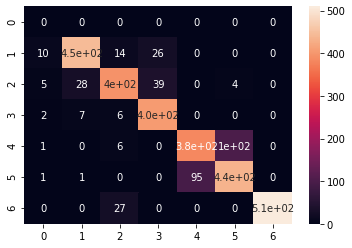

In [22]:
y_test_pred = (model.predict(X_test) > 0.5) * 1

y_test_class = np.argmax(y_test, axis=1)

y_test_pred_class = np.argmax(y_test_pred, axis=1)

sns.heatmap(confusion_matrix(y_test_class, y_test_pred_class), annot=True)

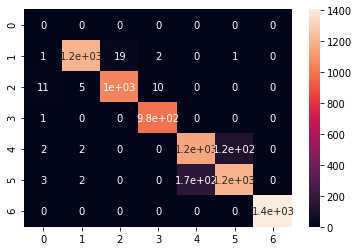

In [23]:
y_train_pred = (model.predict(X_train) > 0.5) * 1

y_train_class = np.argmax(y_train, axis=1)

y_train_pred_class = np.argmax(y_train_pred, axis=1)

sns.heatmap(confusion_matrix(y_train_class, y_train_pred_class), annot=True)

